---

## THE START
 
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import pickle
from sklearn.metrics.pairwise import linear_kernel
import wordcloud as wc
import scipy.sparse as sparse
from sklearn.decomposition import PCA , TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the data
df =pd.read_csv("tmdb_5000_movies.csv")
meta = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
# check shape of the dataset
df.shape , meta.shape

((4803, 20), (4803, 4))

In [4]:
# /preview
meta.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
# rename the column
meta.columns = ['id','tittle','cast','crew']

In [6]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [8]:
#join the dataset 
full_df= df.merge(meta,on='id')

In [9]:
# check columns
full_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [10]:
full_df.shape

(4803, 23)

In [11]:
# check for nulls
full_df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
tittle                     0
cast                       0
crew                       0
dtype: int64

In [12]:
#not going to deal with nulls

## ANALYSIS PHASE

In [13]:

full_df[['budget' ,'popularity' ,'revenue' , 'runtime']].describe()


,budget,popularity,revenue,runtime
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859
std,4.072239e+07,31.816650,1.628571e+08,22.611935
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000


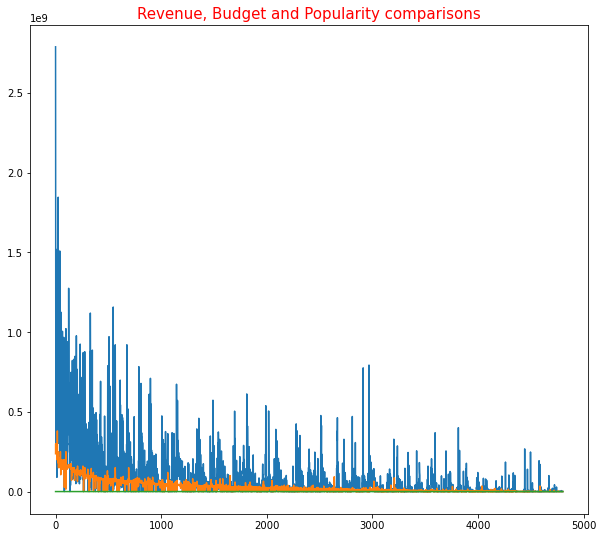

In [14]:
# 1.BUDGET
#fill the null
full_df['budget'].fillna(np.nan , inplace =True)

# plot a line plot to give to check budget , revenue ,popularity range
plt.figure(figsize=(10,9))
plt.title("Revenue, Budget and Popularity comparisons" , fontsize=15 ,c ="r")
plt.plot(full_df[['revenue','budget','popularity']])
plt.show()

In [15]:
# check the movies that generated highest income
revenue = full_df[['title' , 'revenue']]
revenue = revenue.sort_values('revenue' , ascending = False)
# check top 15
revenue[:15]

,title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
124,Frozen,1274219009
31,Iron Man 3,1215439994
546,Minions,1156730962
26,Captain America: Civil War,1153304495


In [16]:
# movies with top budgets
budget = full_df[['budget' , 'title']]
budget =  budget.sort_values('budget' ,ascending = False)

# check top 15
budget[:15]


,budget,title
17,380000000,Pirates of the Caribbean: On Stranger Tides
1,300000000,Pirates of the Caribbean: At World's End
7,280000000,Avengers: Age of Ultron
10,270000000,Superman Returns
4,260000000,John Carter
6,260000000,Tangled
5,258000000,Spider-Man 3
13,255000000,The Lone Ranger
46,250000000,X-Men: Days of Future Past
22,250000000,The Hobbit: The Desolation of Smaug


In [17]:
# check the most popular movie
popular = full_df[['title' , 'popularity']]
# sort
popular = popular.sort_values("popularity" , ascending = False)

# checl top 15
popular[:15]

,title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564
28,Jurassic World,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889
82,Dawn of the Planet of the Apes,243.791743
200,The Hunger Games: Mockingjay - Part 1,206.227151
88,Big Hero 6,203.734590


Text(0.5, 1.0, '15 Most Popular Movies ')

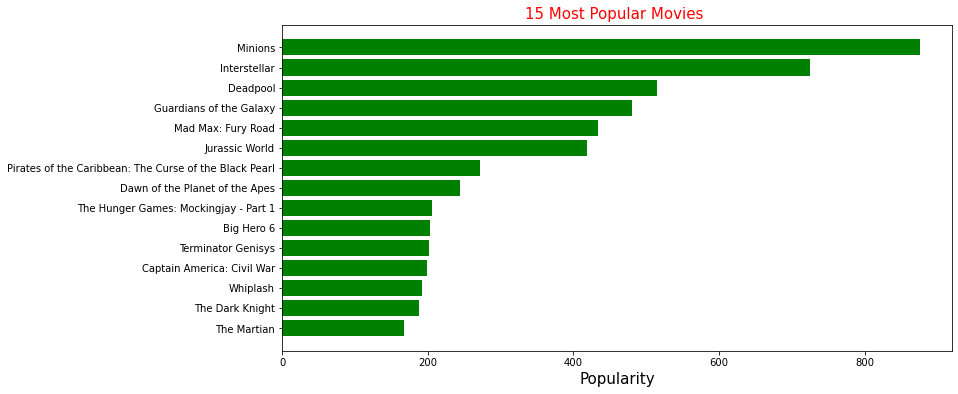

In [18]:
plt.figure(figsize=(12,6))
plt.barh(popular['title'][:15] , 
         popular['popularity'][:15] ,
         color='green',
        align='center')
plt.gca().invert_yaxis()
plt.xlabel("Popularity" , fontsize=15)
plt.title("15 Most Popular Movies " , c ='r' , fontsize=15)

In [19]:
# convert to datetime
full_df["release_date"] = pd.to_datetime(full_df['release_date'].fillna(2000))

# get the year of creation

created_year = full_df['release_date'].dt.year

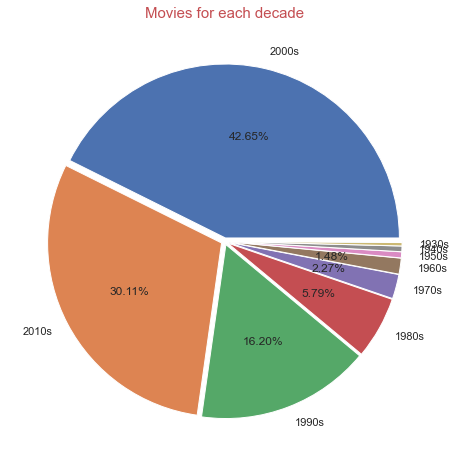

In [20]:
# create a df for 10 years steps(Per decade)
sns.set(style="white")

# diviesd the df for realease date by 10 and multiply by 10
# we are adding "s" to be displayed like 1990s

created_decade = df.release_date.dropna().apply(lambda x:str(int(x[:4])//10*10)+'s')
decade_counts = created_decade.value_counts(normalize = True)


# have labels for the decade years
labels=['' if value<0.001 else str(year) for (year,value) in decade_counts.items()]

f, ax = plt.subplots(figsize=(10, 8))
explode = [0.02 if decade_counts.iloc[i] < 100 else 0.001 for i in range(decade_counts.size)]
plt.title("Movies for each decade" , fontsize=15, c='r')
plt.pie(decade_counts,
        labels=labels,
        autopct=lambda val:'{:1.2f}%'.format(val) if val > 1 else '',
        explode=explode )
plt.show()

In [21]:
# for x in full_df['genres'][0].split("\'"):
#     print(x)

# df['genres']
# df['genres'][0].strip("'[").strip("]'")


In [22]:
# eval(df['genres'][0])

In [23]:
# function to extract names from genres and keyword columns

def Get_all_Key_words(dict_values,index="name"):
    """
    THIS FUNCTION EXTRRACTS NAMES FROM ALL DICT OF DICTS IN SOME COLUMNS that will be passed
    Returns the unique words with their counts
    """
    results = {}
    for i in range(len(dict_values)):
        list1=eval(dict_values.iloc[i])
        for x in list1:
            results.setdefault(x[index],[])
            results[x[index]].append(i)
    
    return {key:len(value) for (key,value) in results.items()}

In [24]:

# function to plot barplot on the genres and keywords
def Create_bar_plots(data , title, max_values =20 ):  
    """
    Function to plot bar graph
    """
    all_counts=Get_all_Key_words(data , "name")
    #sort them
    all_counts=sorted(all_counts.items(),key=lambda x:x[1],reverse=True)
    
    #get the top max_values words
    top_n_counts=dict(all_counts[:max_values])
    f, ax = plt.subplots(figsize=(14, 6))
    plt.title(f"{title}" , c ='r' ,fontsize = 17)
    plt.xticks(rotation=60, fontsize=15 , c='r')
    plt.bar(top_n_counts.keys() , top_n_counts.values() , align ='center' , color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.show()

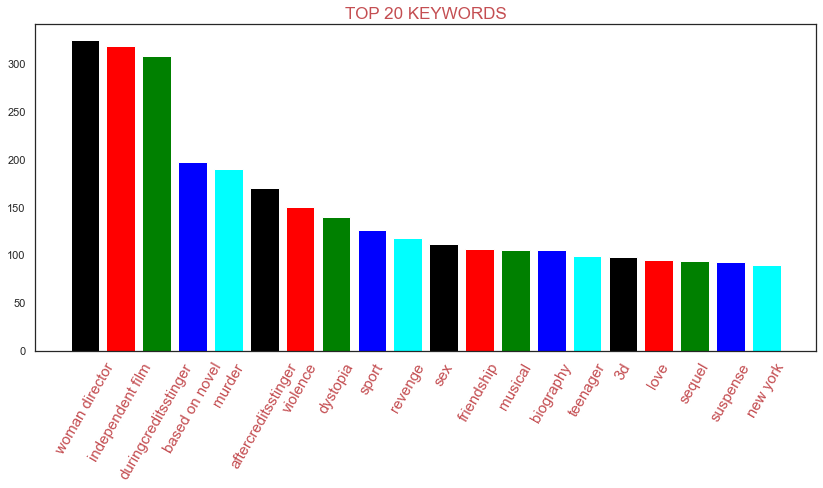

In [25]:
# numbers of movies of different genres and keywords
# /plot for top_n keywords
Create_bar_plots(full_df.keywords , "TOP 20 KEYWORDS")

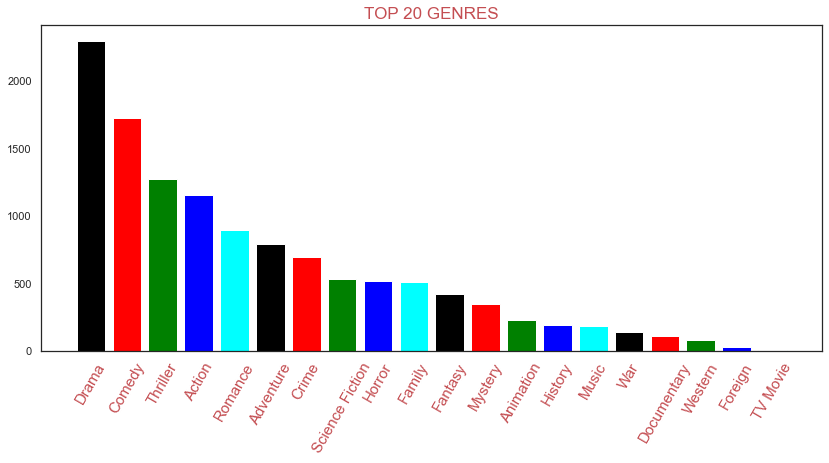

In [26]:
# plot for top_n_genres
Create_bar_plots(full_df.genres , "TOP 20 GENRES")

In [27]:
# check language of movie.
full_df['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
ta       2
ro       2
id       2
ar       2
cs       2
xx       1
ky       1
is       1
te       1
tr       1
vi       1
ps       1
sl       1
af       1
nb       1
hu       1
pl       1
no       1
el       1
Name: original_language, dtype: int64

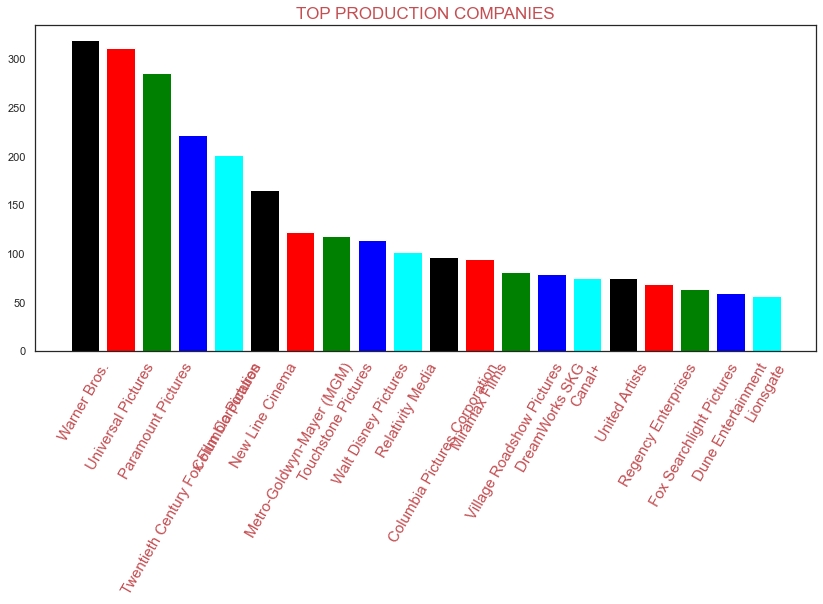

In [28]:
# check production companies
# Get_all_Key_words(full_df.production_companies , "name")

Create_bar_plots(full_df.production_companies , "TOP PRODUCTION COMPANIES")

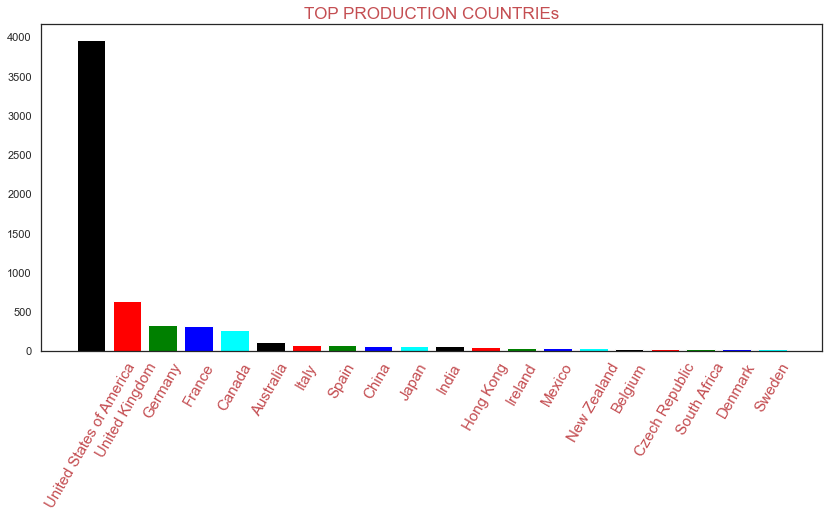

In [29]:
# check top production countries
# Get_all_Key_words(full_df.production_countries , "name")

Create_bar_plots(full_df.production_countries , "TOP PRODUCTION COUNTRIEs")

In [30]:
# movies runtime duration
full_df['runtime'].describe()

count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

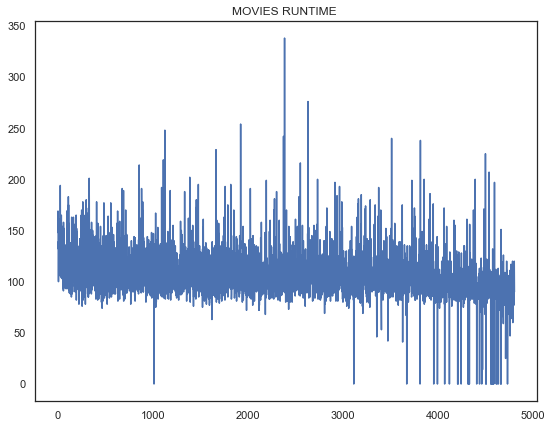

In [31]:
# check time duration for the movies
plt.figure(figsize=(9,7))
plt.title("MOVIES RUNTIME ")
plt.plot(full_df['runtime'])

#### MOST Have runtime between 100 to 150 minutes

In [32]:
# function to create word cloud

def Create_word_cloud(data , title):
    word_cloud = wc.WordCloud(
        background_color="white"
        ,margin=20,
        width=900,
        height=700,
        prefer_horizontal=0.75,
        max_words=500,
        scale=2
        
    )
    all_counts = Get_all_Key_words(data , "name")
    #genererate 
    word_cloud.generate_from_frequencies(all_counts)
    plt.figure(figsize=(14,8))
    plt.title(f"{title}" , fontsize=17 , c='r')
    plt.imshow(word_cloud)
    plt.show()


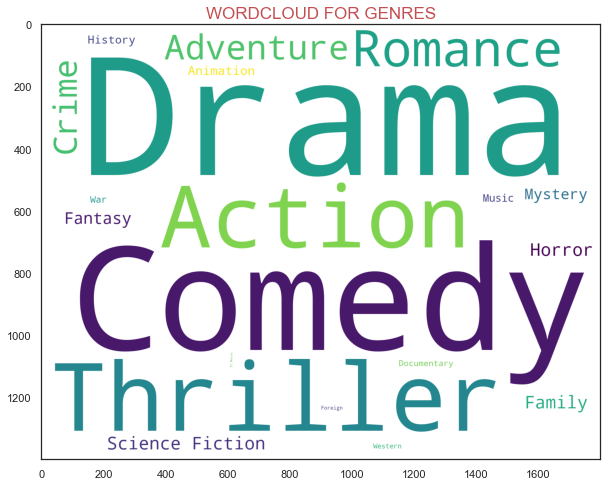

In [33]:
# plot for genres
Create_word_cloud(full_df.genres , "WORDCLOUD FOR GENRES")

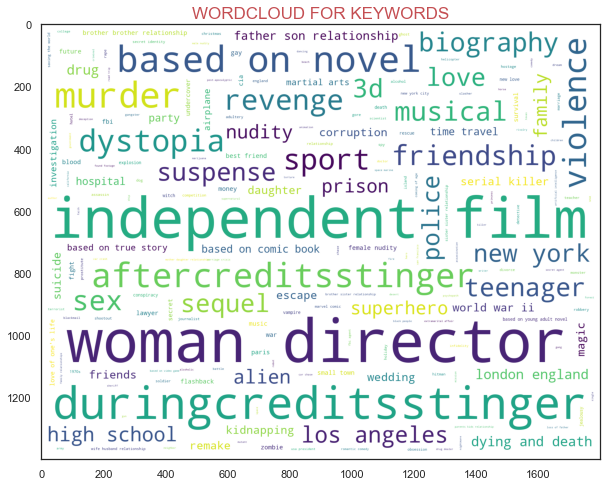

In [34]:
# plot for keywords
Create_word_cloud(full_df.keywords , "WORDCLOUD FOR KEYWORDS")

In [35]:
# let check in the 1900 centeries and 20th what were the common words

df_20th = full_df.keywords[full_df.release_date.dt.year//100*100==1900]
df_21st = full_df.keywords[full_df.release_date.dt.year//100*100==2000]

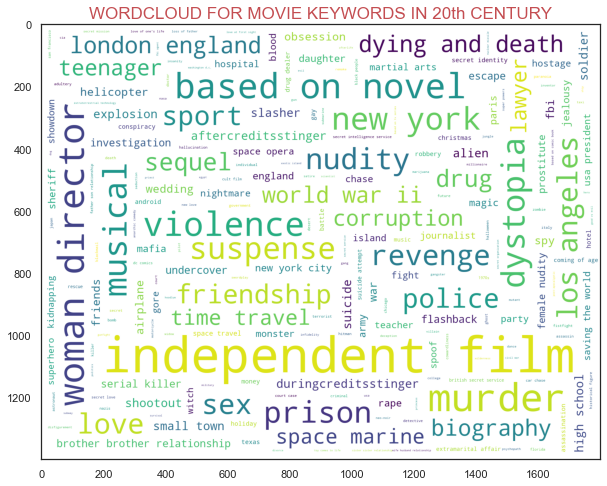

In [36]:
# plot word cloud for 20th
Create_word_cloud(df_20th , "WORDCLOUD FOR MOVIE KEYWORDS IN 20th CENTURY")

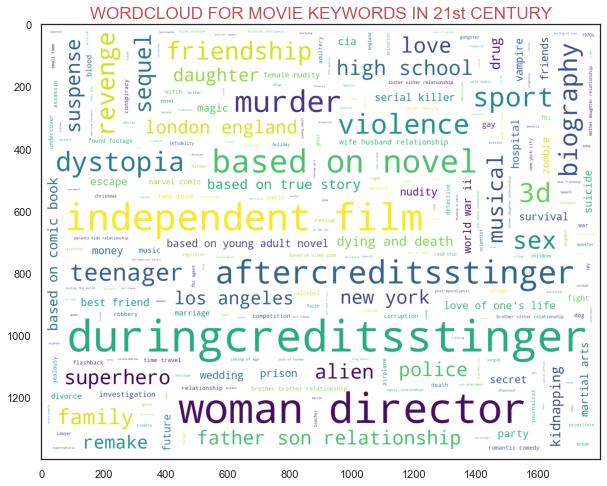

In [37]:
# plot word cloud for 21st century
Create_word_cloud(df_21st , "WORDCLOUD FOR MOVIE KEYWORDS IN 21st CENTURY")

In [38]:
data = full_df['overview']

In [39]:
data.head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [40]:
# check nulls
data.isna().sum()

3

In [41]:
# fill nulls with a value.
# How to prepare coffee while watching recommended movie
data.fillna("How to prepare coffee while watching recommended movie" , inplace = True)
# recheck the null
data.isna().sum()

0

## CREATING RECOMMENTATION ENGINE

In [42]:
# recommendation for
# create engine for the recommendation

class RecommendorSystem:
    def __init__(self):
        print("****** SYSYTEM ENGINE INITIATED *******\n")
        #define vectorizer
        self.vect = TfidfVectorizer(stop_words='english')
    
    def fit(self,df):
        self.df =df
        # fit 
        data = df['overview']
        # fill nulls with a value.
        # How to prepare coffee while watching recommended movie
        data.fillna("How to prepare coffee while watching recommended movie" , inplace = True)
        self.vect.fit(data.values)
        # transform the data
        self.tf_df = self.vect.transform(data.values)
        #reduce the matrix
        self.reduced_matrix = self.dimension_reduction(self.tf_df)
        # Compute the cosine similarity matrix
        self.cos_similarity = linear_kernel(self.reduced_matrix, self.reduced_matrix)
        # create a new series for holding movie title and index in small case
        self.recomender_indeces = pd.Series(df['title'].index , index=df['title'].str.lower())
    
    def dimension_reduction(self , sparse_matrix):
        trunc = TruncatedSVD(n_components = 500)
        return trunc.fit_transform(sparse_matrix)

    # get weighted score 
    #this will be used incase the movie title passed is not available
    def Weight_Rating_score(self ,movie):
        #get the percentile for top recommentation
        x_percent = movie['vote_count'].quantile(0.85)
        #mean
        MEAN = movie['vote_average'].mean()
        votes = movie['vote_count']
        vote_avg = movie['vote_average']
        # votes based recommentation
        return (votes/(votes+x_percent) * vote_avg) + (x_percent/(x_percent+votes) * MEAN)
        
    def predict(self , title , numbers=15):
        print("****** THE FOLLOWING ARE RECOMMENDATIONS **********")
        
        try:
            movie_index = self.recomender_indeces[title.lower()]
            movie_scores = self.cos_similarity[movie_index]

            #convert to list
            movie_scores = list(enumerate(movie_scores))

            #sort by by sublist
            movie_scores = sorted(movie_scores , reverse =1 , key= lambda movie:movie[1])

            #return the indexes for the  movie recommended based on the number passed

            #we are returning only movies upto ****NUMBER**** the parameter can be changed on predict function
            movie_scores = [movie_index[0]  for movie_index in movie_scores[1:numbers]]
            
            #recommended movies
            recommended =    self.df['title'].iloc[movie_scores]
        
        except Exception as e:
            #create a new feature score
            new_df = df.copy()
            new_df['score'] = self.Weight_Rating_score(df)
            new_df = new_df.sort_values('score', ascending=False)
            #get recommended movies randomly
            return new_df[['title']].sample(numbers)
        else:
            #return the title for the movie with index selected
            return recommended
        
        

In [43]:
model = RecommendorSystem()

model.fit(full_df)

****** SYSYTEM ENGINE INITIATED *******



In [44]:
# check the predictiosn
# model.predict("awn of the planet pemle the Apes")

In [45]:
# save the plot for usage
import pickle
filename = 'movie_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [46]:
# main program
def main():
    """
    This is the main controller for the movie recommender system
    """
    print("MOVIE RECOMMENDATION SYSTEM")
    # load the model
    model = pickle.load(open("movie_model.sav", 'rb'))
    
    while True:
        print("\n\n")
        title = input("Enter movie title for recommendation or press 1 to exit :  ")
        if title == "1":
            break;
        else:
            display(model.predict(title))
    

In [ ]:
# run the program
main()

MOVIE RECOMMENDATION SYSTEM



Enter movie title for recommendation or press 1 to exit :  inception
****** THE FOLLOWING ARE RECOMMENDATIONS **********


3078                      Peaceful Warrior
3972                      Chicago Overcoat
914                   Central Intelligence
2207                             12 Rounds
464                   Hotel Transylvania 2
134     Mission: Impossible - Rogue Nation
1328                              The Town
1267                                Duplex
1714                           Serendipity
2002                               Haywire
613                              The Score
1470                                Stolen
3076                    The House of Mirth
161                          Gods of Egypt
Name: title, dtype: object




Enter movie title for recommendation or press 1 to exit :  Inception
****** THE FOLLOWING ARE RECOMMENDATIONS **********


3078                      Peaceful Warrior
3972                      Chicago Overcoat
914                   Central Intelligence
2207                             12 Rounds
464                   Hotel Transylvania 2
134     Mission: Impossible - Rogue Nation
1328                              The Town
1267                                Duplex
1714                           Serendipity
2002                               Haywire
613                              The Score
1470                                Stolen
3076                    The House of Mirth
161                          Gods of Egypt
Name: title, dtype: object